In [1]:
import tensorflow as tf

# Loading MNIST data contain
60000 training set and 10000 testing set, tensorflow already has, can be loaded as keras

In [2]:
mnist=tf.keras.datasets.mnist #dataset of all handwritten dataset

After loading dataset devide into train and test dataset.

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

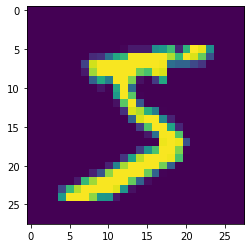

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()#In order to check is the image is color of binary

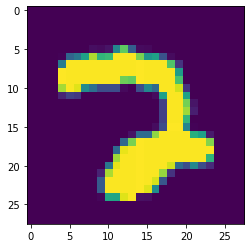

In [6]:
plt.imshow(x_train[120])
plt.show()#image is color and 28x28 pixels

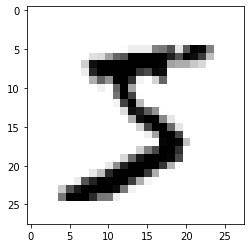

In [7]:
plt.imshow(x_train[0],cmap=plt.cm.binary)#converting to binary,pixels also reveted

#checing to value of each pixel before NORMALIZATION

In [8]:
print(x_train[0])#0 corosponds to white and 255 black matrix=28x28

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Backgrond is black in color and number is white

**Normalize the data so that it is in between 0 and 1**

In [9]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [10]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Data is normalized**

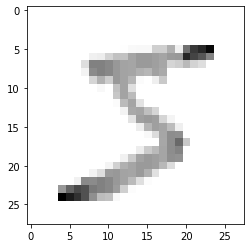

In [11]:
plt.imshow(x_train[0],cmap=plt.cm.binary)


Here we can see the intensity is decreased after normalization

In [12]:
print(y_train[0])#this first digit is 5, verifying

5


# Resizing image for convolution

In [19]:
import numpy as np
IMG_SIZE=28
x_trainr=x_train.reshape(-1,IMG_SIZE,IMG_SIZE,1)#reshaping one more dimension for filter(kernel) opration
x_testr=x_test.reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [23]:
x_trainr.shape #the above -1 corresonds to maximum dimesion in python, we can see


(60000, 28, 28, 1)

In [24]:
x_testr.shape

(10000, 28, 28, 1)

# Creating a Deep Neural Network

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D #this is the layers we need

In [33]:
model=Sequential()#initalizing out model in seq. layer

####first convolution layer
model.add(Conv2D(64,(3,3), input_shape=x_trainr.shape[1:]))#only for the first convolution layer we have to mention input size
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))#making to 4,4 matrix valuable to 2,2 ###reducing the size

####2nd convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

####3rd convolution layer 
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

####Fully connected layer 1
model.add(Flatten())#Before using fully connected layer need to be flatten, ie 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

####Fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

####Fully connected layer 3
model.add(Dense(10))
model.add(Activation("softmax"))
#softmax fuction is used for class probabilites, for binary use sigmoid


In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_3 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_4 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [36]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [39]:
model.fit(x_trainr,y_train,epochs=5, validation_split=0.3)##training

Epoch 1/5
1313/1313 [==============================] - 33s 25ms/step - loss: 0.3229 - accuracy: 0.8972 - val_loss: 0.1295 - val_accuracy: 0.9611
Epoch 2/5
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0971 - accuracy: 0.9711 - val_loss: 0.0929 - val_accuracy: 0.9704
Epoch 3/5
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0702 - accuracy: 0.9790 - val_loss: 0.0649 - val_accuracy: 0.9796
Epoch 4/5
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0566 - accuracy: 0.9823 - val_loss: 0.1098 - val_accuracy: 0.9662
Epoch 5/5
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0609 - val_accuracy: 0.9815


In [40]:
test_loss,test_accr=model.evaluate(x_testr,y_test)
print("Test loss on 10000 test samples ", test_loss)
print("Validation accuracy on 10000 test samples ", test_accr)

313/313 [==============================] - 2s 6ms/step - loss: 0.0572 - accuracy: 0.9837
Test loss on 10000 test samples  0.05723682790994644
Validation accuracy on 10000 test samples  0.9836999773979187


In [41]:
predection=model.predict([x_testr])

313/313 [==============================] - 2s 6ms/step


In [42]:
print(predection)

[[2.16108678e-08 4.57337228e-06 1.16646797e-05 ... 9.99979734e-01
  1.11412085e-07 7.42733391e-07]
 [3.84060084e-03 1.11589667e-04 9.95634258e-01 ... 1.20967998e-05
  1.02108766e-04 4.65669609e-06]
 [9.38947053e-08 9.99995708e-01 1.19951579e-07 ... 1.06229914e-08
  4.01221314e-07 2.46332221e-09]
 ...
 [6.35287314e-14 8.37045445e-06 3.38534395e-10 ... 1.17829413e-05
  2.78555308e-06 6.97230234e-07]
 [1.79618542e-06 3.98175786e-07 2.65491792e-07 ... 6.82581401e-07
  5.77505489e-05 4.91297851e-06]
 [2.74224221e-05 8.62700801e-07 2.59232070e-06 ... 1.86405752e-10
  3.13445344e-06 4.25647784e-08]]


ABOVE SHOWING CLASS PROBABLITIES

In [44]:
print(np.argmax(predection[0]))#printing max prob of first

7


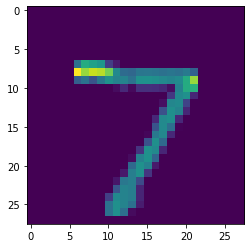

In [46]:
plt.imshow(x_test[0])

# THE PREDICTION IS CORRECT

In [48]:
model.save("DigitRecognition")

INFO:tensorflow:Assets written to: DigitRecognition\assets


INFO:tensorflow:Assets written to: DigitRecognition\assets
